In [48]:
import numpy as np
import pandas as pd

In [49]:
df=pd.read_csv("finalised_dataset.csv")

In [50]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      12628 non-null  int64  
 1   state_names     12628 non-null  object 
 2   district_names  12628 non-null  object 
 3   crop_year       12628 non-null  int64  
 4   season_names    12628 non-null  object 
 5   crop_names      12628 non-null  object 
 6   area            12628 non-null  float64
 7   temperature     12628 non-null  float64
 8   wind_speed      12628 non-null  float64
 9   pressure        12628 non-null  float64
 10  humidity        12628 non-null  float64
 11  soil_type       12628 non-null  object 
 12  N               12628 non-null  float64
 13  P               12628 non-null  float64
 14  K               12628 non-null  float64
 15  production      12496 non-null  float64
 16  Yield           12496 non-null  float64
dtypes: float64(10), int64(2), objec

In [52]:
df.shape

(12628, 17)

In [53]:
df.isnull().sum()

Unnamed: 0          0
state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
pressure            0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        132
Yield             132
dtype: int64

In [54]:
df = df.drop(df[df['production'].isnull()].index)
df = df.drop(df[df['Yield'].isnull()].index)

In [55]:
df.isnull().sum()

Unnamed: 0        0
state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
pressure          0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
Yield             0
dtype: int64

In [56]:
df.shape

(12496, 17)

In [57]:
#describing all the numeric columns in the table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12496.0,131496.602833,3642.305959,125191.000000,128342.750000,131492.500000,134645.250000,1.378180e+05
crop_year,12496.0,2005.177977,5.012958,1997.000000,2001.000000,2005.000000,2010.000000,2.014000e+03
area,12496.0,25783.133563,59352.520458,1.000000,500.000000,3600.000000,23400.000000,7.263000e+05
temperature,12496.0,21.044197,0.595380,20.020095,20.521441,21.048002,21.556143,2.207986e+01
wind_speed,12496.0,2.039796,0.040673,1.970008,2.004352,2.039791,2.075307,2.109983e+00
pressure,12496.0,1014.500796,0.865105,1013.000384,1013.759452,1014.501598,1015.250983,1.016000e+03
humidity,12496.0,21.034510,0.592442,20.020101,20.528607,21.028289,21.541321,2.207998e+01
N,12496.0,63.628838,206.857679,0.000000,0.615000,4.068000,10.580000,9.283720e+02
P,12496.0,13.188444,23.775753,0.000000,0.000000,3.760000,15.870000,1.112000e+02
K,12496.0,6.224012,14.153817,0.000000,0.000000,0.000000,1.501000,5.560000e+01


In [58]:
#describing all the non-numeric columns 
df.describe(exclude=np.number).T

,count,unique,top,freq
state_names,12496,1,Maharashtra,12496
district_names,12496,35,AHMEDNAGAR,488
season_names,12496,5,Kharif,7201
crop_names,12496,34,Maize,1053
soil_type,12496,7,clay,1825


In [59]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222


In [60]:
df.rename(columns={'N':'Nitrogen'},inplace=True)
df.rename(columns={'P':'Phosphorous'},inplace=True)
df.rename(columns={'K':'Pottasium'},inplace=True)

In [61]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,Nitrogen,Phosphorous,Pottasium,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222


In [62]:
df.duplicated().sum()

0

In [63]:
#Checking for outliers

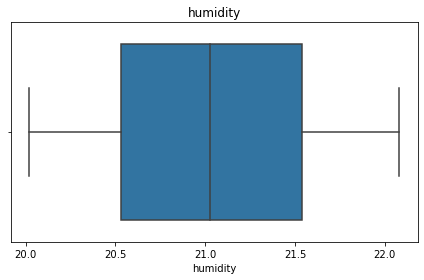

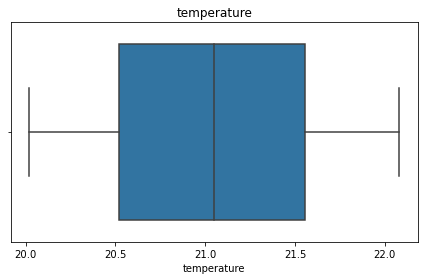

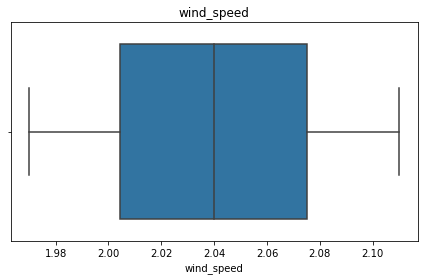

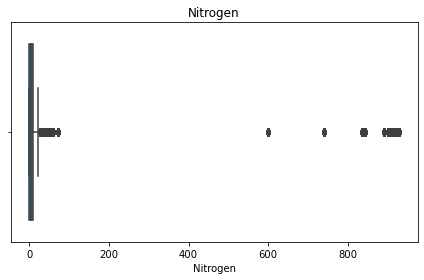

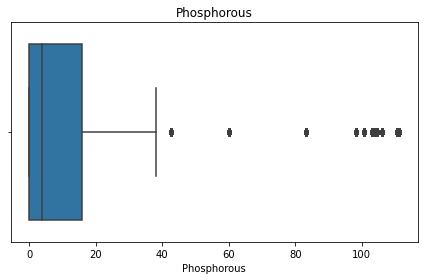

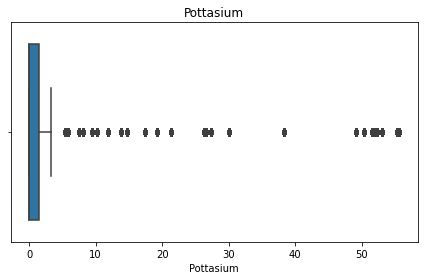

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name=['humidity','temperature','wind_speed','Nitrogen','Phosphorous','Pottasium']
for i in column_name:
    sns.boxplot(data=df, x=i)
    plt.title(i)
    plt.tight_layout()
    plt.show()